In [49]:
#importing all the modules that required for the coursework
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import skimage.feature
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
# loading the provided training and testing data 
    training_data = np.load('trnImage.npy')
    training_labels = np.load('trnLabel.npy').reshape(-1)
    testing_data = np.load('tstImage.npy')
    testing_labels = np.load('tstLabel.npy').reshape(-1)


In [55]:
#extracting the hog features by using a for loop
    testing_images= testing_data[0,0,0,:].size
    testing_features = np.zeros((testing_images,324))
    training_images = training_data[0,0,0,:].size
    training_features = np.zeros((training_images,324))
    
    for i in range(0,training_images,1):
        training_features[i] = skimage.feature.hog(training_data[:,:,:,i], visualize=False, block_norm='L2-Hys')
    
    for i in range(0,testing_images,1):
        testing_features[i] = skimage.feature.hog(testing_data[:,:,:,i], visualize=False, block_norm='L2-Hys')

    
    
    

In [45]:
# This method shows the dimensions of the extracted hog features
def scatterPlot():
    plt.figure()
    plt.scatter(training_features[:,0],training_features[:,1],c =training_labels,cmap='prism',marker = 'o')
    plt.xlabel('dimension-0')
    plt.ylabel('dimension-1')
    plt.title('dimension 0 vs 1 in hog features')
    plt.show()

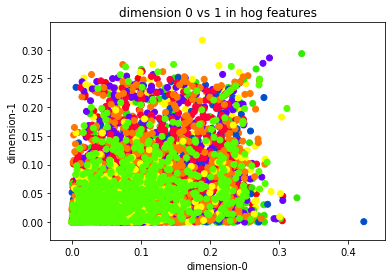

In [46]:
scatterPlot()

In [24]:
# This method is used to plot confusion matrix for all the selected methods.
def plot_confusion_matrix(cm,names,title = 'confusion matrix of the model',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark = np.arange(len(names))
    plt.xticks(tick_mark, names, rotation=90)
    plt.yticks(tick_mark, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

In [41]:
# This method implements k_means clustering algorithm on the training features and returns the metrics of confusion matrix and plots confusion matri 
def kmeans_clustering():
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(training_features)
    predict_test = kmeans.predict(testing_features)
    kmeans_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print("confusion matrix: \n", kmeans_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(kmeans_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 15.1%
confusion matrix: 
 [[ 1  4 11  7 15  1 18  4 25 14]
 [ 4  4  9  2 22  3 23  8 23  2]
 [ 5  7  5 24  5 23  6  8  1 16]
 [23 13  5 12  2 31  2  5  0  7]
 [11 18  6  8  5 19  6 19  3  5]
 [20  6  0  9  2 51  0  6  1  5]
 [29  4  1 23  5  7  7  4  0 20]
 [ 9 28  4  5  0 17  1 30  1  5]
 [ 1  3 32  2  9  1 15  1 34  2]
 [ 6 25 17  3  9  3  3 20 12  2]]
              precision    recall  f1-score   support

    airplane       0.01      0.01      0.01       100
  automobile       0.04      0.04      0.04       100
        bird       0.06      0.05      0.05       100
         cat       0.13      0.12      0.12       100
        deer       0.07      0.05      0.06       100
         dog       0.33      0.51      0.40       100
        frog       0.09      0.07      0.08       100
       horse       0.29      0.30      0.29       100
        ship       0.34      0.34      0.34       100
       truck       0.03      0.02      0.02       100

    accu

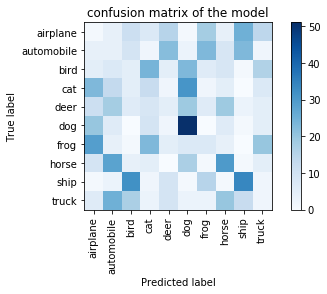

In [42]:
kmeans_clustering()

In [77]:
def gaussianMixture():
    gmm = GaussianMixture(n_components = 10)
    gmm.fit(training_features)
    predict_test = gmm.predict(testing_features)
    gmm_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    print("confusion matrix: \n", gmm_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(gmm_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 9.2%
confusion matrix: 
 [[ 2  1  3  5  2 44  1 28  8  6]
 [ 4  1  8  1  0 48  6 20  4  8]
 [ 0  6 10 16  6 35  0 17  6  4]
 [ 0  3 25 18  0 32  0  6  8  8]
 [ 0  0 13 10  1 55  0  8  5  8]
 [ 0  0 14 25  0 45  0  5  6  5]
 [ 1  3 14  6  2 55  2 11  2  4]
 [ 0  0 12  8  1 43  0  4 16 16]
 [ 6  4  3  1  1 36  1 42  1  5]
 [ 1  2  7  1  0 53  0 24  4  8]]
              precision    recall  f1-score   support

    airplane       0.14      0.02      0.04       100
  automobile       0.05      0.01      0.02       100
        bird       0.09      0.10      0.10       100
         cat       0.20      0.18      0.19       100
        deer       0.08      0.01      0.02       100
         dog       0.10      0.45      0.16       100
        frog       0.20      0.02      0.04       100
       horse       0.02      0.04      0.03       100
        ship       0.02      0.01      0.01       100
       truck       0.11      0.08      0.09       100

    accur

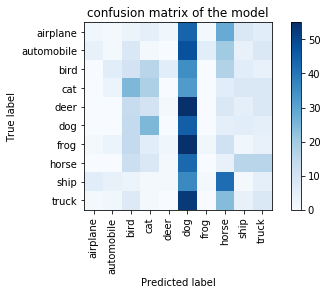

In [78]:
gaussianMixture()

In [33]:
#This method runs lda on the training data and test it on the test data and returns the confusion matrix and accuracy percentage
def linear_discriminant_analysis():
    lda = LinearDiscriminantAnalysis()
    lda.fit(training_features,training_labels)
    predict_test = lda.predict(testing_features)
    lda_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    print("confusion matrix: \n", lda_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(lda_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 49.4%
confusion matrix: 
 [[61  5  6  0  5  1  4  3 12  3]
 [ 5 48  2  4  5  1  6  4 14 11]
 [ 7  4 34  6 10 20 11  4  4  0]
 [ 0  4 15 26 15 13 15  7  2  3]
 [ 3  2  8  8 56  6  7  4  2  4]
 [ 1  2 12 11  7 49  9  8  0  1]
 [ 3  2  9  8  9  8 51  7  0  3]
 [ 0  1  4 11 19  5  3 48  3  6]
 [13 14  3  1  2  0  1  1 57  8]
 [ 3  9  2  2  5  2  0  4  9 64]]
              precision    recall  f1-score   support

    airplane       0.64      0.61      0.62       100
  automobile       0.53      0.48      0.50       100
        bird       0.36      0.34      0.35       100
         cat       0.34      0.26      0.29       100
        deer       0.42      0.56      0.48       100
         dog       0.47      0.49      0.48       100
        frog       0.48      0.51      0.49       100
       horse       0.53      0.48      0.51       100
        ship       0.55      0.57      0.56       100
       truck       0.62      0.64      0.63       100

    accu

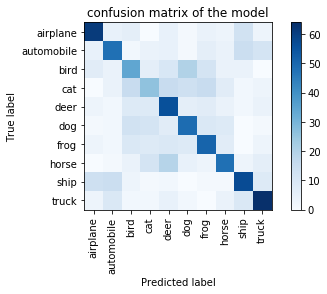

In [34]:
linear_discriminant_analysis()

In [25]:
#This method runs SVM on the training data and test it on the test data and returns the confusion matrix and accuracy percentage
def supportVectorMachine():
    svc = SVC(kernel = 'linear' , C = 1)
    svc.fit(training_features,training_labels)
    predict_y = svc.predict(testing_features)
    accuracy = np.sum(np.equal(testing_labels,predict_y)) / testing_labels.shape[0] * 100
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    svm_cm = metrics.confusion_matrix(testing_labels,predict_y)
    print("confusion matrix: \n", svm_cm)
    print(classification_report(testing_labels,predict_y, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(svm_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 51.4%
confusion matrix: 
 [[61  2  5  2  5  1  1  4 15  4]
 [ 5 54  2  4  5  1  3  3 11 12]
 [ 6  3 42  8  7 17  8  4  4  1]
 [ 2  4 13 30 15 13 14  5  1  3]
 [ 3  4 10  9 52  5 10  2  3  2]
 [ 1  1 15 10  6 49  8  8  1  1]
 [ 4  5  6  6  7 11 58  3  0  0]
 [ 2  3  6  8 13  7  5 50  1  5]
 [17 12  3  2  2  0  2  0 55  7]
 [ 3  7  1  5  3  3  0  4 11 63]]
              precision    recall  f1-score   support

    airplane       0.59      0.61      0.60       100
  automobile       0.57      0.54      0.55       100
        bird       0.41      0.42      0.41       100
         cat       0.36      0.30      0.33       100
        deer       0.45      0.52      0.48       100
         dog       0.46      0.49      0.47       100
        frog       0.53      0.58      0.56       100
       horse       0.60      0.50      0.55       100
        ship       0.54      0.55      0.54       100
       truck       0.64      0.63      0.64       100

    accu

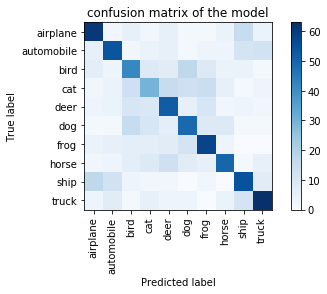

In [26]:
supportVectorMachine()

# Applying the models using PCA extracted features 
-The models used:
    k-means clustering,
    Gaussian mixture modelling,
    linear discriminant analysis,
    linear regression,
    Support vector machine.

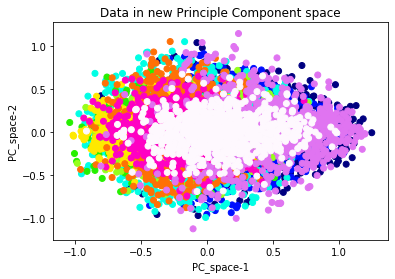

In [56]:
#PCA is used to reduce the dimensions of the data and in turn different methods are runned on the reduced dataset to see the results.
pca = PCA(n_components =2)
pca.fit(training_features)
data_projected = pca.transform(training_features)
plt.figure()
plt.scatter(data_projected[:,0], data_projected[:,1], c=training_labels, cmap='gist_ncar', marker = 'o')#, c=y, 
plt.xlabel("PC_space-1")
plt.ylabel("PC_space-2")
plt.title("Data in new Principle Component space")
plt.show()



In [58]:
#k_means on reduced dimensionality
def pca_kmeans_clustering():
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(training_features)
    predict_test = kmeans.predict(testing_features)
    kmeans_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print("confusion matrix: \n", kmeans_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(kmeans_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 10.6%
confusion matrix: 
 [[ 1  4  4  6 15 15 18  1 24 12]
 [ 3  8  6  2 22  2 21  5 23  8]
 [24  8  8 24  4 15  7  5  1  4]
 [32  5 11 13  2  9  2 21  0  5]
 [21 16 16 11  5  5  5 13  3  5]
 [53  7  5  8  2  5  0 19  1  0]
 [ 9  3  3 23  6 22  6 27  0  1]
 [18 29 27  5  0  7  0  9  1  4]
 [ 1  1  3  2  8  2 15  1 36 31]
 [ 3 23 28  2  6  2  3  5 13 15]]
              precision    recall  f1-score   support

    airplane       0.01      0.01      0.01       100
  automobile       0.08      0.08      0.08       100
        bird       0.07      0.08      0.08       100
         cat       0.14      0.13      0.13       100
        deer       0.07      0.05      0.06       100
         dog       0.06      0.05      0.05       100
        frog       0.08      0.06      0.07       100
       horse       0.08      0.09      0.09       100
        ship       0.35      0.36      0.36       100
       truck       0.18      0.15      0.16       100

    accu

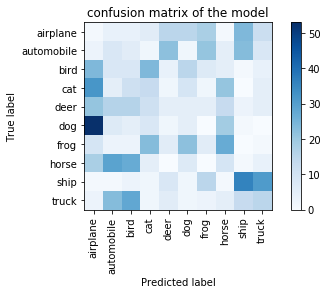

In [59]:
pca_kmeans_clustering()

In [70]:
#gaussianMixture on reduced dimensionality
def pca_gaussianMixture():
    gmm = GaussianMixture(n_components = 10)
    gmm.fit(training_features)
    predict_test = gmm.predict(testing_features)
    gmm_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    print("confusion matrix: \n", gmm_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(gmm_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 9.4%
confusion matrix: 
 [[ 9  4  2  6 20  2  1 12  3 41]
 [ 4  1  2  3 18  0  2 23  6 41]
 [ 4  5  0 21 16  5  0  5 12 32]
 [ 5  2  0 21  3  0  3  6 30 30]
 [ 5  2  0 15  7  2  2  7 11 49]
 [ 6  0  0 25  5  0  1  2 17 44]
 [ 4  4  0  9  9  1  2  3 13 55]
 [15  1  0  7  2  1  9  7 15 43]
 [ 0  5  8  1 40  1  0 13  2 30]
 [ 2  3  1  1 20  0  1 18  9 45]]
              precision    recall  f1-score   support

    airplane       0.17      0.09      0.12       100
  automobile       0.04      0.01      0.02       100
        bird       0.00      0.00      0.00       100
         cat       0.19      0.21      0.20       100
        deer       0.05      0.07      0.06       100
         dog       0.00      0.00      0.00       100
        frog       0.10      0.02      0.03       100
       horse       0.07      0.07      0.07       100
        ship       0.02      0.02      0.02       100
       truck       0.11      0.45      0.18       100

    accur

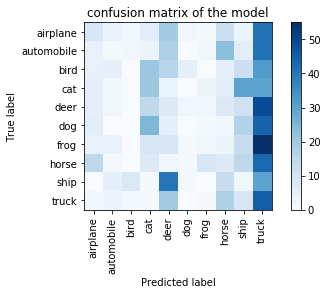

In [72]:
pca_gaussianMixture()

In [79]:
#lda on reduced dimensionality
def pca_linear_discriminant_analysis():
    lda = LinearDiscriminantAnalysis()
    lda.fit(training_features,training_labels)
    predict_test = lda.predict(testing_features)
    lda_cm = metrics.confusion_matrix(testing_labels,predict_test)
    accuracy = np.sum(np.equal(testing_labels,predict_test)) / testing_labels.shape[0] * 100
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    print("confusion matrix: \n", lda_cm)
    print(classification_report(testing_labels,predict_test, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(lda_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 49.4%
confusion matrix: 
 [[61  5  6  0  5  1  4  3 12  3]
 [ 5 48  2  4  5  1  6  4 14 11]
 [ 7  4 34  6 10 20 11  4  4  0]
 [ 0  4 15 26 15 13 15  7  2  3]
 [ 3  2  8  8 56  6  7  4  2  4]
 [ 1  2 12 11  7 49  9  8  0  1]
 [ 3  2  9  8  9  8 51  7  0  3]
 [ 0  1  4 11 19  5  3 48  3  6]
 [13 14  3  1  2  0  1  1 57  8]
 [ 3  9  2  2  5  2  0  4  9 64]]
              precision    recall  f1-score   support

    airplane       0.64      0.61      0.62       100
  automobile       0.53      0.48      0.50       100
        bird       0.36      0.34      0.35       100
         cat       0.34      0.26      0.29       100
        deer       0.42      0.56      0.48       100
         dog       0.47      0.49      0.48       100
        frog       0.48      0.51      0.49       100
       horse       0.53      0.48      0.51       100
        ship       0.55      0.57      0.56       100
       truck       0.62      0.64      0.63       100

    accu

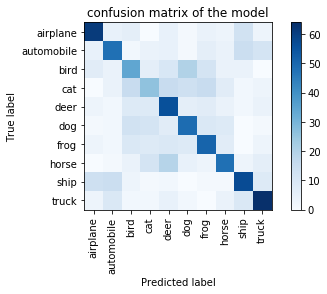

In [80]:
pca_linear_discriminant_analysis()

In [75]:
#SVM on reduced dimensionality
def pca_supportVectorMachine():
    svc = SVC(kernel = 'linear' , C = 1)
    svc.fit(training_features,training_labels)
    predict_y = svc.predict(testing_features)
    accuracy = np.sum(np.equal(testing_labels,predict_y)) / testing_labels.shape[0] * 100
    print('Percentage accuracy on testing set is: ' + format(accuracy) + '%')
    label_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    svm_cm = metrics.confusion_matrix(testing_labels,predict_y)
    print("confusion matrix: \n", svm_cm)
    print(classification_report(testing_labels,predict_y, target_names=label_names))
    plt.figure()
    plot_confusion_matrix(svm_cm,label_names)
    plt.show()

Percentage accuracy on testing set is: 51.4%
confusion matrix: 
 [[61  2  5  2  5  1  1  4 15  4]
 [ 5 54  2  4  5  1  3  3 11 12]
 [ 6  3 42  8  7 17  8  4  4  1]
 [ 2  4 13 30 15 13 14  5  1  3]
 [ 3  4 10  9 52  5 10  2  3  2]
 [ 1  1 15 10  6 49  8  8  1  1]
 [ 4  5  6  6  7 11 58  3  0  0]
 [ 2  3  6  8 13  7  5 50  1  5]
 [17 12  3  2  2  0  2  0 55  7]
 [ 3  7  1  5  3  3  0  4 11 63]]
              precision    recall  f1-score   support

    airplane       0.59      0.61      0.60       100
  automobile       0.57      0.54      0.55       100
        bird       0.41      0.42      0.41       100
         cat       0.36      0.30      0.33       100
        deer       0.45      0.52      0.48       100
         dog       0.46      0.49      0.47       100
        frog       0.53      0.58      0.56       100
       horse       0.60      0.50      0.55       100
        ship       0.54      0.55      0.54       100
       truck       0.64      0.63      0.64       100

    accu

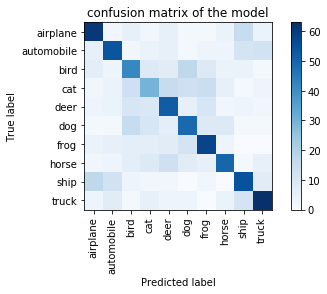

In [76]:
pca_supportVectorMachine()